# Тема “Обучение без учителя”
## Задание 1

###### Импортируйте библиотеки pandas, numpy и matplotlib.

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

###### Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [149]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [150]:
y = pd.DataFrame(boston.target, columns=['price'])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

###### Масштабируйте данные с помощью StandardScaler.

In [152]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

###### Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42. Постройте диаграмму рассеяния на этих данных.

In [153]:
X_train_tsne = TSNE(n_components=2, learning_rate=250, random_state=42).fit_transform(X_train_sc)
X_train_tsne.shape

(404, 2)

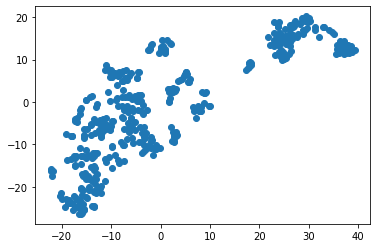

In [154]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1]);

## Задание 2


###### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

In [155]:
from sklearn.cluster import KMeans

In [156]:
kmeans = KMeans(n_clusters=2, max_iter = 100, random_state=42 )
labels_train = kmeans.fit_predict(X_train_sc)

In [157]:
pd.value_counts(labels_train)

1    266
0    138
dtype: int64

In [158]:
labels_test = kmeans.predict(X_test_sc)

Text(22, 6, 'Кластер 1')

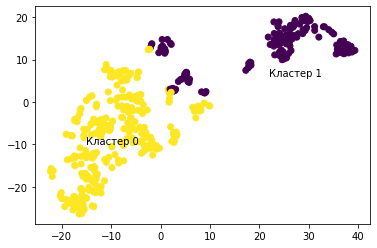

In [159]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train);
plt.text(-15, -10, 'Кластер 0')
plt.text(22, 6, 'Кластер 1')

###### Вычислите средние значения price и CRIM в разных кластерах.

In [160]:
X_train['CRIM'][labels_train == 0].mean()

10.03253507246377

In [161]:
X_train['CRIM'][labels_train == 1].mean()

0.2766786090225563

In [162]:
y_train[labels_train == 0].mean()

price    16.493478
dtype: float64

In [163]:
y_train[labels_train == 1].mean()

price    26.066541
dtype: float64

Text(0.5, 0, 'Цена')

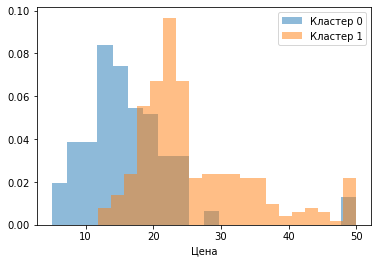

In [164]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('Цена')

Text(0.5, 0, 'Цена')

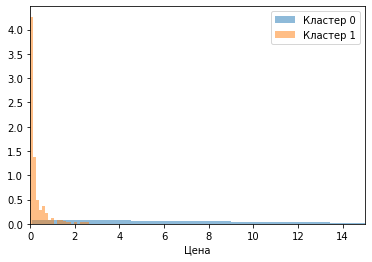

In [165]:
plt.hist(X_train['CRIM'][labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(X_train['CRIM'][labels_train == 1], bins=20, density=True, alpha=0.5)
plt.xlim(0,15)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('Цена')


## Задание 3
###### Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

In [167]:
lr.fit(X_train_sc, y_train)
y_test_pred = lr.predict(X_test_sc)
r2_score(y_test, y_test_pred)

0.6262727067493521

In [168]:
lr.fit(X_train_sc[labels_train==0,:], y_train[labels_train==0])
y_test_pred_0 = lr.predict(X_test_sc[labels_test==0,:])
r2_score(y_test[labels_test==0], y_test_pred_0)

0.5137776167324613

In [169]:
lr.fit(X_train_sc[labels_train==1,:], y_train[labels_train==1])
y_test_pred_1 = lr.predict(X_test_sc[labels_test==1, :])
r2_score(y_test[labels_test==1], y_test_pred_1)

0.8764564469910325

Объединим объекты издвух кластеров

In [170]:
y_test_all = np.vstack([y_test[labels_test==0], y_test[labels_test==1]])

In [171]:
y_test_pred_all = np.vstack([y_test_pred_0, y_test_pred_1])

In [172]:
r2_score(y_test_all, y_test_pred_all)

0.7916850389195086